In [1]:
import pandas as pd

file_name = 'data/seoul_covid_10_31_.csv'
print(file_name)

data/seoul_covid_10_31_.csv


In [2]:
data = pd.read_csv(file_name,encoding='utf8')
print(data.shape)
data.info()

(6056, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      6056 non-null   int64 
 1   환자      6056 non-null   int64 
 2   확진일     6056 non-null   object
 3   거주지     6056 non-null   object
 4   여행력     6056 non-null   object
 5   접촉력     6056 non-null   object
 6   퇴원현황    5574 non-null   object
dtypes: int64(2), object(5)
memory usage: 331.3+ KB


In [3]:
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


In [4]:
data.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6051,5,9,1.31.,성북구,-,#5 접촉,퇴원
6052,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6053,3,6,1.30.,종로구,-,#3 접촉,퇴원
6054,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
6055,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


In [5]:
# 연번 순서대로 내림차순 정리함
data = data.sort_values(by='연번',ascending=False)
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


### 시각화 관련 설정

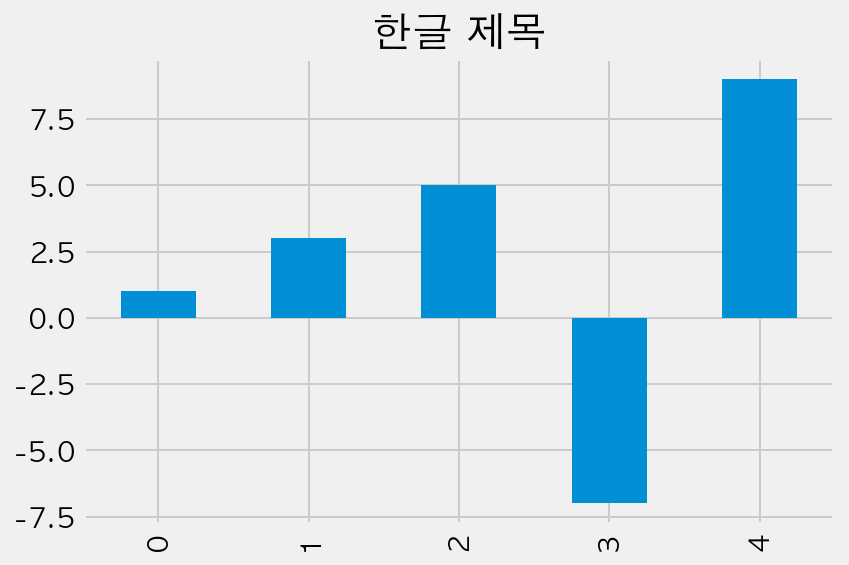

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

#한글폰트 설정
plt.rc('font',family='AppleGothic')
#해당 축(axis)의 레이블의 값에 마이너스가 있는 경우, 마이너스를 출력하기 위한 마이너스 폰트 설정
plt.rc('axes',unicode_minus=False)

#그래프 style 설정->3가지 종류가 있음
#ggplot,fivethirtyeight, dark_background

# 1. plt.style.use('fivethirtyeight')
# 2. plt.style.use('ggplot')
plt.style.use('fivethirtyeight')


#간단한 bar plot 그리기
pd.Series([1,3,5,-7,9]).plot.bar(title='한글 제목')

# 시각화 할 때, 폰트가 좀 더 선명하게 보이도록 하는 설정
# 레티나 디스플레이가 지원되는 환경에서만 가능
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### 1.확진일
* 확진일 컬럼의 타입 object를 datetime타입으로 변경하기 to_datetime()함수 사용
* 확진일자 컬럼의 값에서 dt.month와 dt.week를 사용해서 월 과 주 컬럼을 추가
* 확진일자 별로 시각화

In [10]:
data['확진일'].value_counts().head()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
Name: 확진일, dtype: int64

In [13]:
#확진일 컬럼 값의 타입 확인
print(data['확진일'].dtypes)
#pandas의 to_datetime()함수를 사용해서 날짜타입으로 변경하기
#새로운 확진일 컬럼을 추가하기
data['확진일자'] = pd.to_datetime("2020-"+data['확진일'].str.replace('.','-'))
print(data['확진일자'].dtypes)

object
datetime64[ns]


In [14]:
data[['확진일','확진일자']].head()

,확진일,확진일자
0,10.31.,2020-10-31
1,10.31.,2020-10-31
2,10.31.,2020-10-31
3,10.31.,2020-10-31
4,10.31.,2020-10-31


In [18]:
#확진일자 컬럼에서 월 만 추출하고, 월 컬럼을 추가하기
data['월'] = data['확진일자'].dt.month
data[['확진일','확진일자','월']].head()

,확진일,확진일자,월
0,10.31.,2020-10-31,10
1,10.31.,2020-10-31,10
2,10.31.,2020-10-31,10
3,10.31.,2020-10-31,10
4,10.31.,2020-10-31,10


In [22]:
# 해당 연도에서 몇번째 "주" 인지 추출하기
data['주'] = data['확진일자'].dt.week
data[['확진일','확진일자','월','주']].tail()

,확진일,확진일자,월,주
6051,1.31.,2020-01-31,1,5
6052,1.30.,2020-01-30,1,5
6053,1.30.,2020-01-30,1,5
6054,1.30.,2020-01-30,1,5
6055,1.24.,2020-01-24,1,4


In [24]:
# 확진일자로 line plt(선그래프) 그리기
data['확진일자'].value_counts().sort_index()

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-10-27    31
2020-10-28    31
2020-10-29    52
2020-10-30    46
2020-10-31    45
Name: 확진일자, Length: 253, dtype: int64

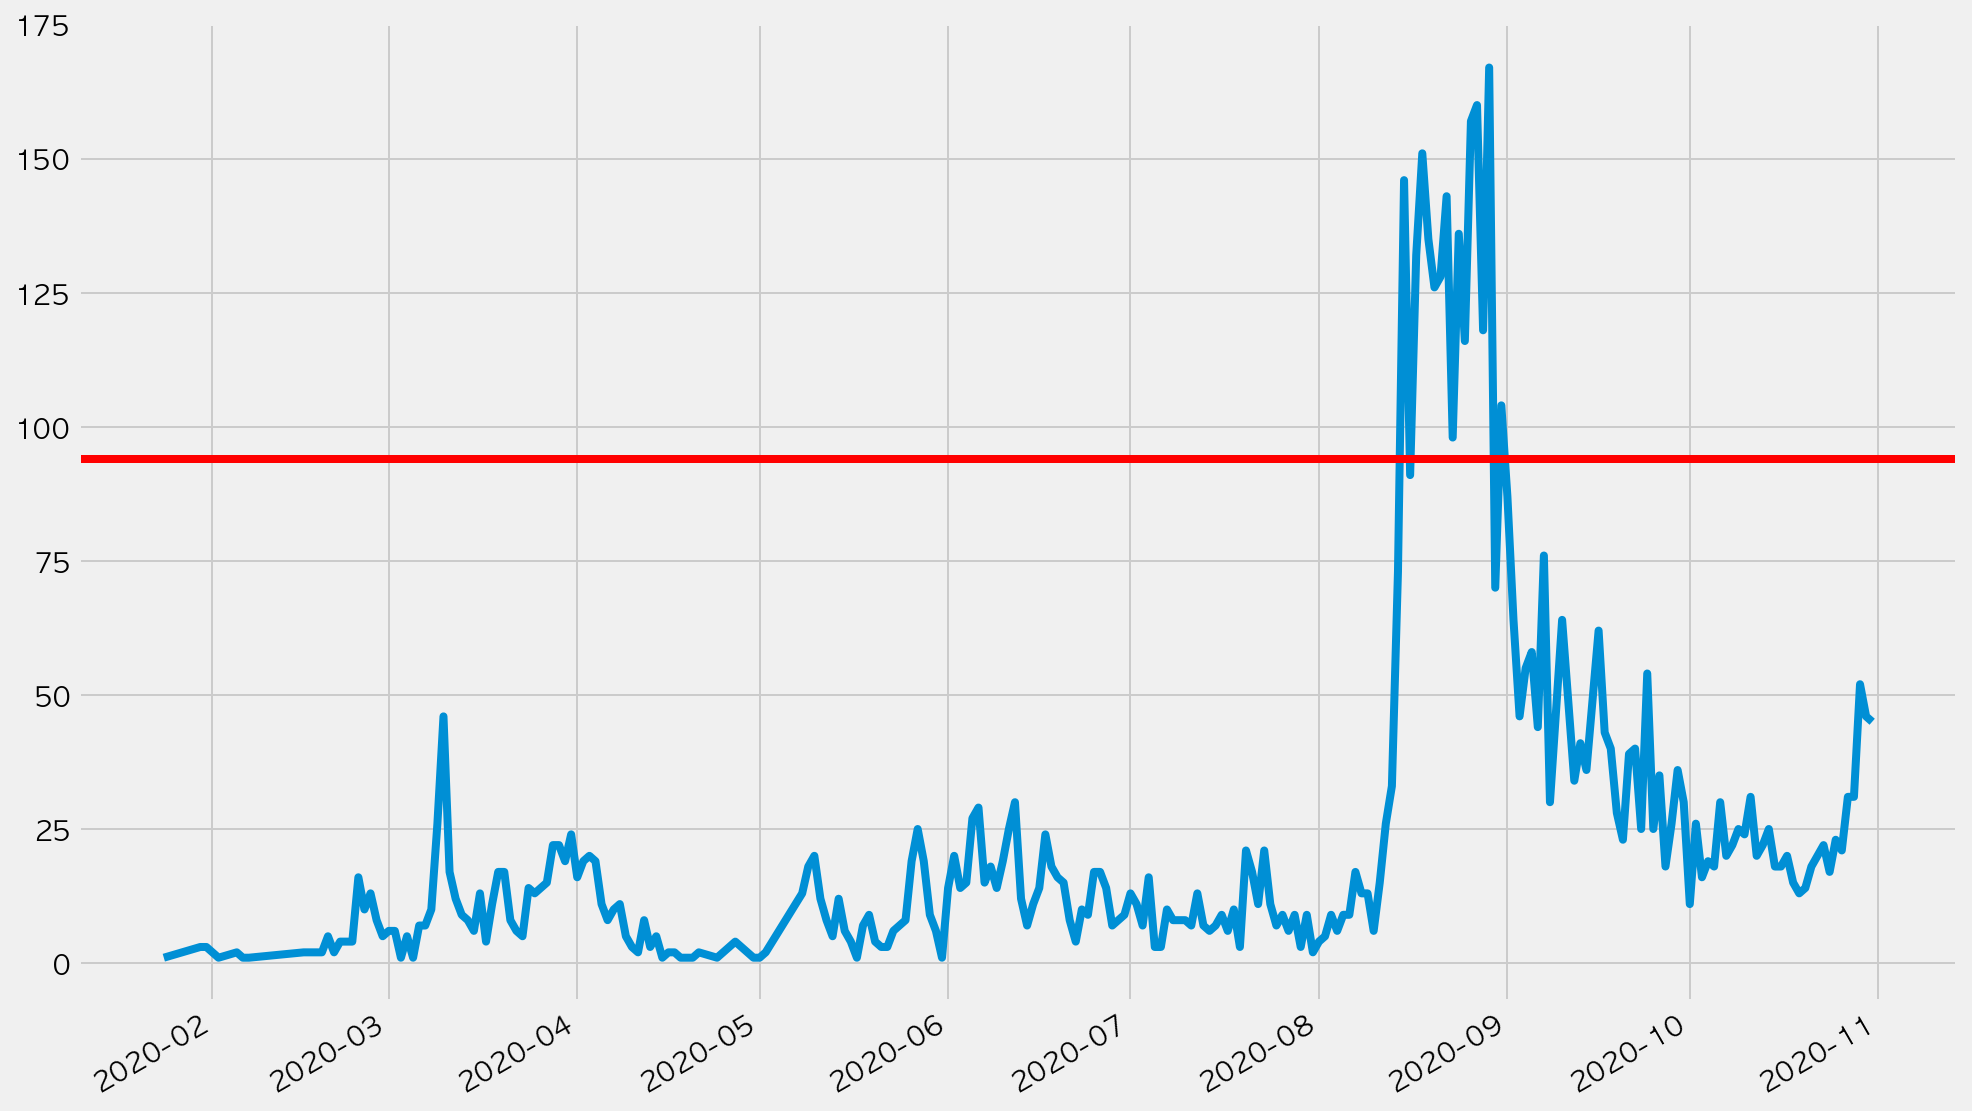

In [34]:
data['확진일자'].value_counts().sort_index().plot(figsize=(15,10))

#수평선 표시하기
plt.axhline(94,color='red',linestyle='-')

### 1.1 선그래프에 값을 표시하기

In [36]:
data['확진일자'].head(2)

0   2020-10-31
1   2020-10-31
Name: 확진일자, dtype: datetime64[ns]

In [40]:
'2020-10-31'[-5:]

'10-31'

In [41]:
myfunc = lambda mystr: mystr[-5:]
myfunc('2020-10-31')

'10-31'

In [44]:
import pandas as pd

series = pd.Series(['2020-10-31','2020-10-29'])
series

0    2020-10-31
1    2020-10-29
dtype: object

In [45]:
series.map(lambda mystr: mystr[-5:])

0    10-31
1    10-29
dtype: object

In [46]:
#series 객체를 str타입으로 변경하고, map() 인자에 lamda 식을 인자로 전달한다.
data['확진일자'].astype(str).map(lambda x : x[-5:])

0       10-31
1       10-31
2       10-31
3       10-31
4       10-31
        ...  
6051    01-31
6052    01-30
6053    01-30
6054    01-30
6055    01-24
Name: 확진일자, Length: 6056, dtype: object

In [48]:
#월,일 컬럼을 추가하기
data['월일']= data['확진일자'].astype(str).map(lambda x : x[-5:])
data[['확진일자','월일']].head()

,확진일자,월일
0,2020-10-31,10-31
1,2020-10-31,10-31
2,2020-10-31,10-31
3,2020-10-31,10-31
4,2020-10-31,10-31


In [51]:
day_count = data['월일'].value_counts().sort_index()
print(len(day_count))
day_count.head()

253


01-24    1
01-30    3
01-31    3
02-02    1
02-05    2
Name: 월일, dtype: int64

In [50]:
#iloc을 사용해서 특정행의 값을 가져오기
day_count.iloc[2]

3

In [53]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count >30:
        print(i,case_count)

28 46
173 33
174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
194 46
195 55
196 58
197 44
198 76
200 47
201 64
202 49
203 34
204 41
205 36
206 49
207 62
208 43
209 40
212 39
213 40
215 54
217 35
220 36
232 31
248 31
249 31
250 52
251 46
252 45


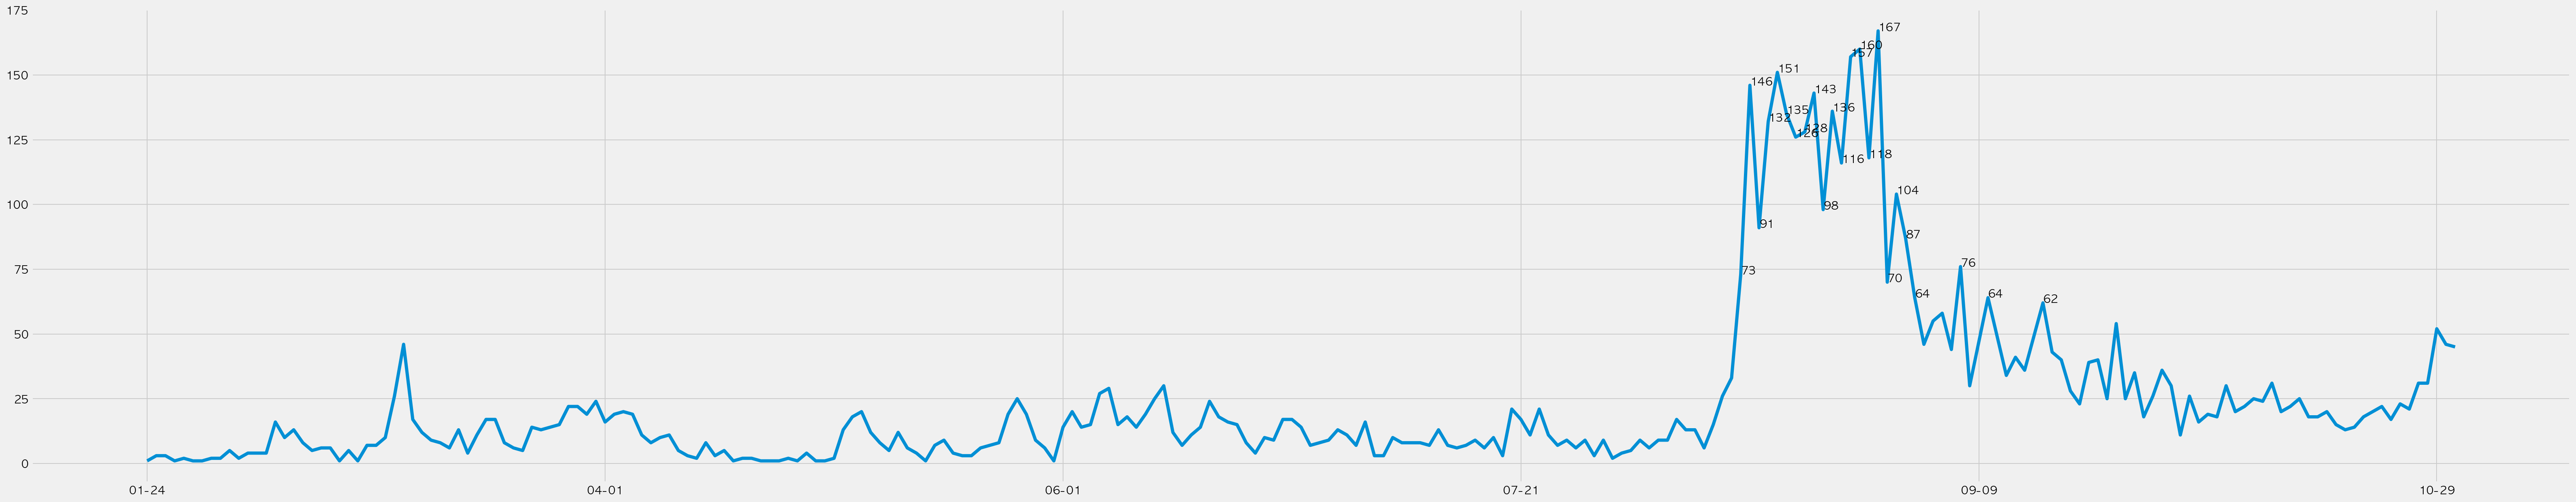

In [63]:
plot = day_count.plot(figsize=(50,10))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count >60:
        plot.text(x=i,y=case_count,s=case_count)
    

### 1.2 확진자가 가장 많이 나온 날

In [64]:
day_count.describe()

count    253.000000
mean      23.936759
std       32.280700
min        1.000000
25%        6.000000
50%       14.000000
75%       25.000000
max      167.000000
Name: 월일, dtype: float64

In [65]:
#확진자가 가장 많았던 날들 찾기
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [66]:
#확진자가 가장 많았던 날의 발생이력을 찾기
data.loc[data['월일']=='08-29']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
2143,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2178,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
2205,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
2206,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
2207,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
...,...,...,...,...,...,...,...,...,...,...,...
2393,3663,19451,8.29.,강남구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2394,3662,19462,8.29.,동대문구,-,동대문구 sk탁구클럽,퇴원,2020-08-29,8,35,08-29
2395,3661,19416,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2396,3660,19434,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 1.3 line plot(선그래프)를 bar plot 으로 그리기

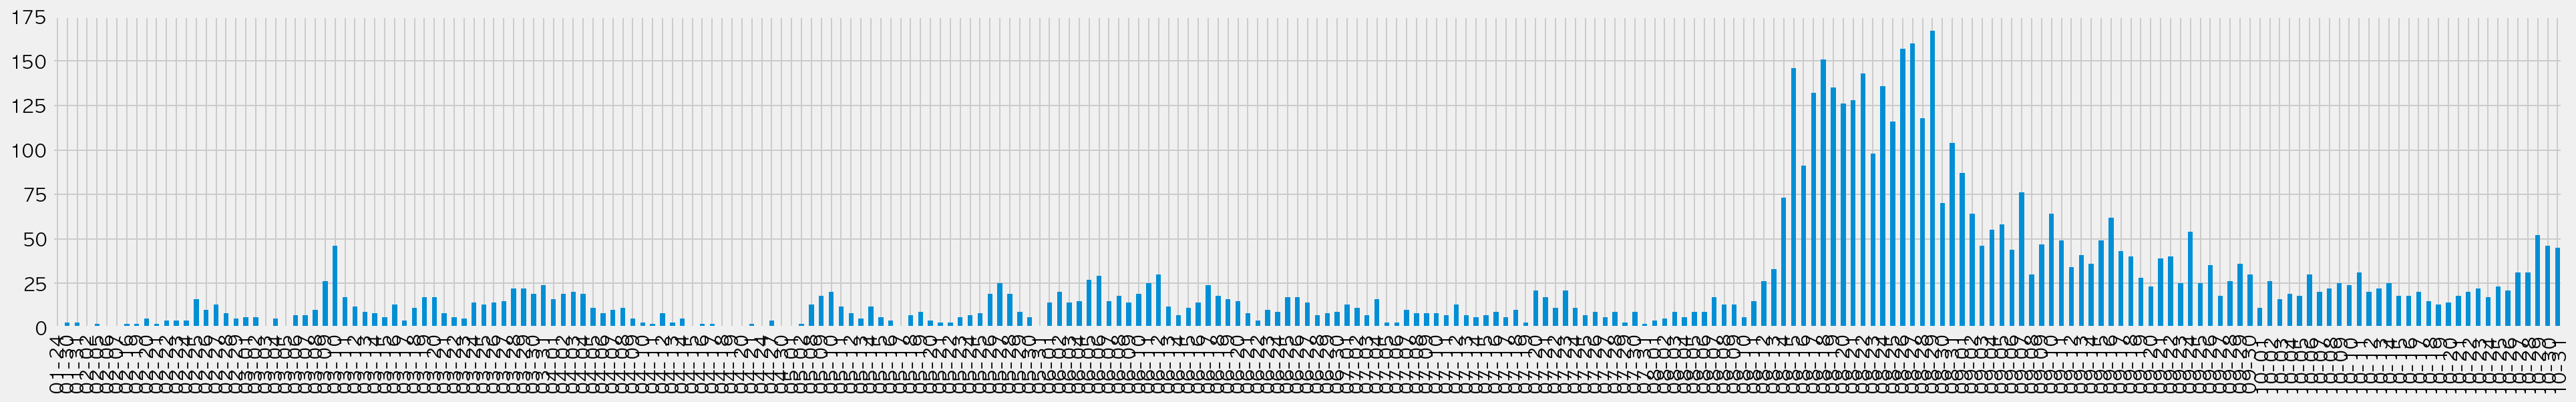

In [67]:
day_count.plot.bar(figsize=(30,4))

중간값:  25.0 <bound method Series.median of 01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
10-27    31
10-28    31
10-29    52
10-30    46
10-31    45
Name: 월일, Length: 253, dtype: int64>


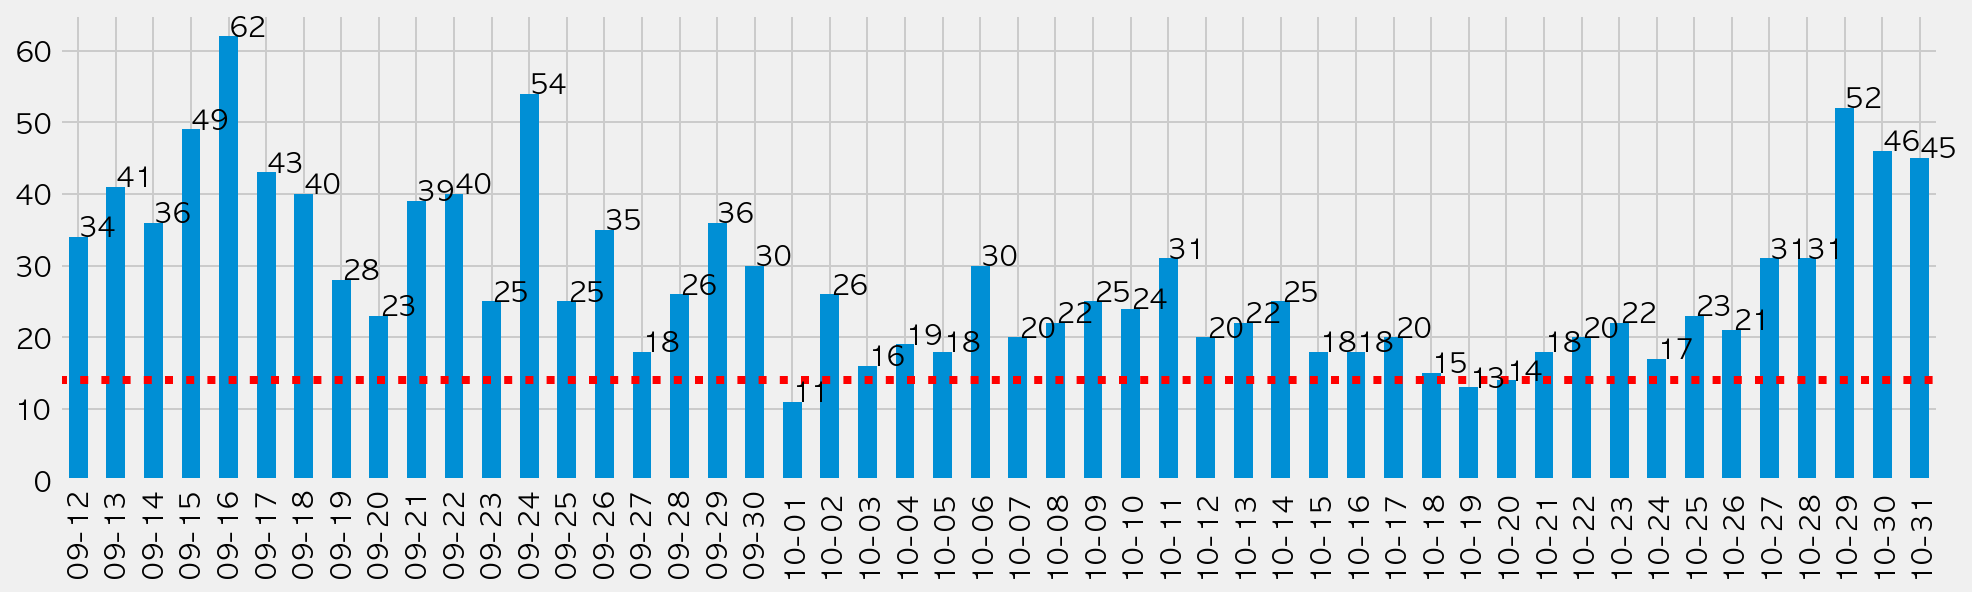

In [77]:
#중간값
print('중간값: ',day_count[-50:].median(),day_count.median)
#슬라이싱으로 최신 데이터만 그려보기
bar_plot = day_count[-50:].plot.bar(figsize=(15,4))
bar_plot.axhline(day_count.median(),linestyle=":",color="red")
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        bar_plot.text(x=i,y=case_count,s=case_count)

### 1.4 월별 확진자 수 그리기

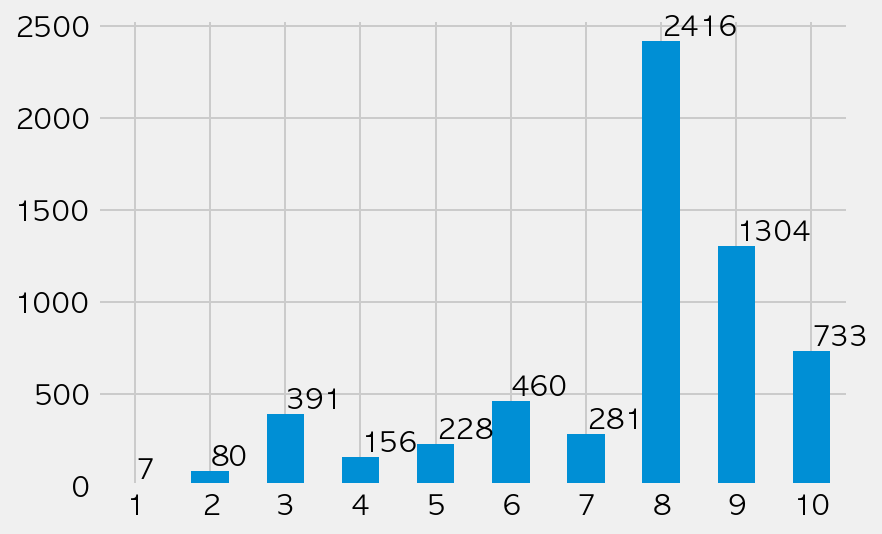

In [96]:
#월별 확진자 수에 대한 빈도수를 구해서 시각화하기
month_case = data['월'].value_counts().sort_index()
month_case
# rot은 누워있는 숫자를 일으켜세운다
bar_plot = month_case.plot.bar(rot=0)
for i in range(len(month_case)):
    bar_plot.text(x=i,y=month_case.iloc[i]+30,s=month_case.iloc[i])


### 2. 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어주기

In [97]:
data['확진일자'].value_counts()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
             ... 
2020-04-15      1
2020-01-24      1
2020-04-20      1
2020-02-02      1
2020-02-06      1
Name: 확진일자, Length: 253, dtype: int64

In [98]:
data.head(2)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN,2020-10-31,10,44,10-31
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN,2020-10-31,10,44,10-31


In [103]:
#가장 첫번째 발병된 행을 선택하기
first_day = data.iloc[-1,7]
first_day

Timestamp('2020-01-24 00:00:00')

In [102]:
#가장 마지막 발병된 행을 선택하기(가장 최근의 확진일자)
last_day = data.iloc[0,7]
last_day

Timestamp('2020-10-31 00:00:00')

In [104]:
#pd.date_range()함수를 통해서 시작하는 날짜부터 끝나는 날짜까지
#Datetimeindex 객체를 생성
days = pd.date_range(first_day, last_day)
print(days)

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', length=282, freq='D')


In [105]:
#DateTimeindex 객체인 days를 DateFrame으로 생성하기
df_days = pd.DataFrame({'확진일자':days})
print(df_days.shape)
df_days.head()

(282, 1)


,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [106]:
data['확진일자'].unique()

array(['2020-10-31T00:00:00.000000000', '2020-10-30T00:00:00.000000000',
       '2020-10-29T00:00:00.000000000', '2020-10-28T00:00:00.000000000',
       '2020-10-27T00:00:00.000000000', '2020-10-26T00:00:00.000000000',
       '2020-10-25T00:00:00.000000000', '2020-10-24T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2020-10-22T00:00:00.000000000',
       '2020-10-21T00:00:00.000000000', '2020-10-19T00:00:00.000000000',
       '2020-10-18T00:00:00.000000000', '2020-10-20T00:00:00.000000000',
       '2020-10-17T00:00:00.000000000', '2020-10-16T00:00:00.000000000',
       '2020-10-15T00:00:00.000000000', '2020-10-14T00:00:00.000000000',
       '2020-10-13T00:00:00.000000000', '2020-10-12T00:00:00.000000000',
       '2020-10-11T00:00:00.000000000', '2020-10-10T00:00:00.000000000',
       '2020-10-09T00:00:00.000000000', '2020-10-08T00:00:00.000000000',
       '2020-10-07T00:00:00.000000000', '2020-10-06T00:00:00.000000000',
       '2020-10-05T00:00:00.000000000', '2020-10-04

In [117]:
#확진일자별로 빈도수 구하기
daily_case = data['확진일자'].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [118]:
#확진일자별로 빈도수를 구한 Series 객체를 DataFrame으로 변환
df_daily_case = daily_case.to_frame()
print(df_daily_case.shape)
df_daily_case.head()

(253, 1)


,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [119]:
#컬럼명 변경 확진일자->확진자수
df_daily_case.columns = ['확진자수']
df_daily_case.head()

,확진자수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [120]:
df_days.head(2)

,확진일자
0,2020-01-24
1,2020-01-25


In [124]:
#확진자가 없는 날도 일자에 표현이 되도록 전체일자와 확진일자 데이터를 merge()함수로 합쳐줌
all_day=df_days.merge(df_daily_case, left_on='확진일자', right_on=df_daily_case.index, how='left')
print(all_day.shape)
all_day.head()

(282, 2)


,확진일자,확진자수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [125]:
#확진자수 결측치(outlier) 값은 0으로 채우고, 값을 누적해서 더해준다.
#fillna()함수는 결측치 값을 다른 값으로 채워줄 때 사용하는 함수
#누적확진 컬럼을 추가하고, 누적된 값(cumsum)을 할당한다.
all_day['누적확진'] = all_day['확진자수'].fillna(0).cumsum()
all_day.tail()

,확진일자,확진자수,누적확진
277,2020-10-27,31.0,5882.0
278,2020-10-28,31.0,5913.0
279,2020-10-29,52.0,5965.0
280,2020-10-30,46.0,6011.0
281,2020-10-31,45.0,6056.0


In [127]:
#확진일자에서 년도는 제외하고 월~일로 '일자'컬럼을 만들자
all_day['일자']=all_day['확진일자'].astype(str).map(lambda x:x[-5:])
all_day.head()

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [129]:
#확진자수,누적확진,일자 컬럼을 선택해서 새로운 DataFrame을 생성하기
cum_day = all_day[['일자','확진자수','누적확진']]
#일자 컬럼을 index로 설정
cum_day = cum_day.set_index('일자')
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
10-27,31.0,5882.0
10-28,31.0,5913.0
10-29,52.0,5965.0


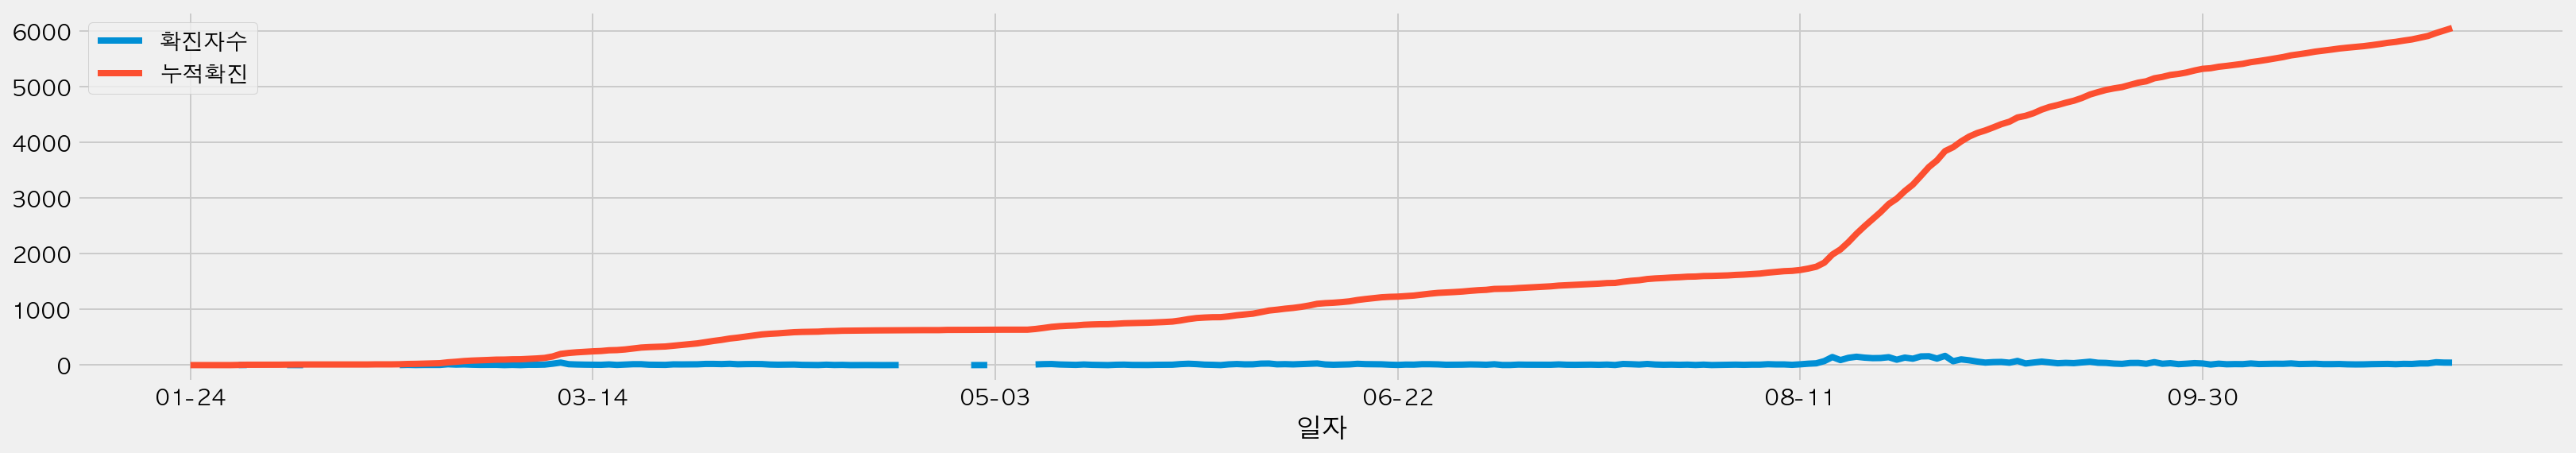

In [131]:
# 1-1.확진자수와 누적확진을 line plot으로 그리기
cum_day.plot(figsize=(25,4))

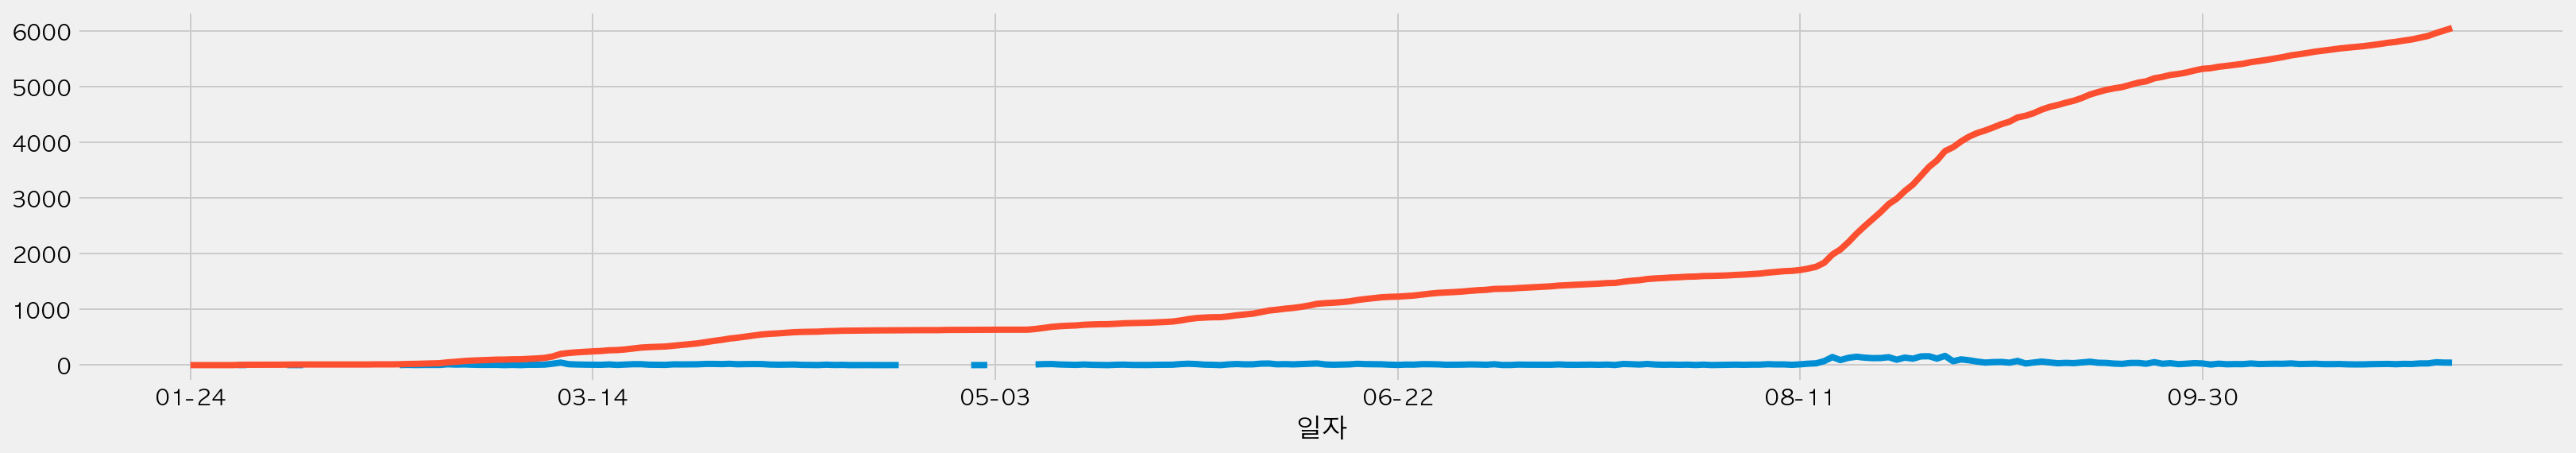

In [134]:
# 1-2.Series 로 2개의 line plot 그리기
cum_day['확진자수'].plot()
cum_day['누적확진'].plot(figsize=(25,4))

### 로그스케일
* 누적확진수와 확진자수의 차이가 너무 커서 그래프가 자세하게 안보일 경우에 로그스케일로 표현을 하면 차이가 큰 값의 스케일을 조정해준다.
* numpy의 log()함수를 사용한다.


In [135]:
cum_day['누적확진']

일자
01-24       1.0
01-25       1.0
01-26       1.0
01-27       1.0
01-28       1.0
          ...  
10-27    5882.0
10-28    5913.0
10-29    5965.0
10-30    6011.0
10-31    6056.0
Name: 누적확진, Length: 282, dtype: float64

In [137]:
import numpy as np

np.log(cum_day['누적확진'])

일자
01-24    0.000000
01-25    0.000000
01-26    0.000000
01-27    0.000000
01-28    0.000000
           ...   
10-27    8.679652
10-28    8.684909
10-29    8.693664
10-30    8.701346
10-31    8.708805
Name: 누적확진, Length: 282, dtype: float64

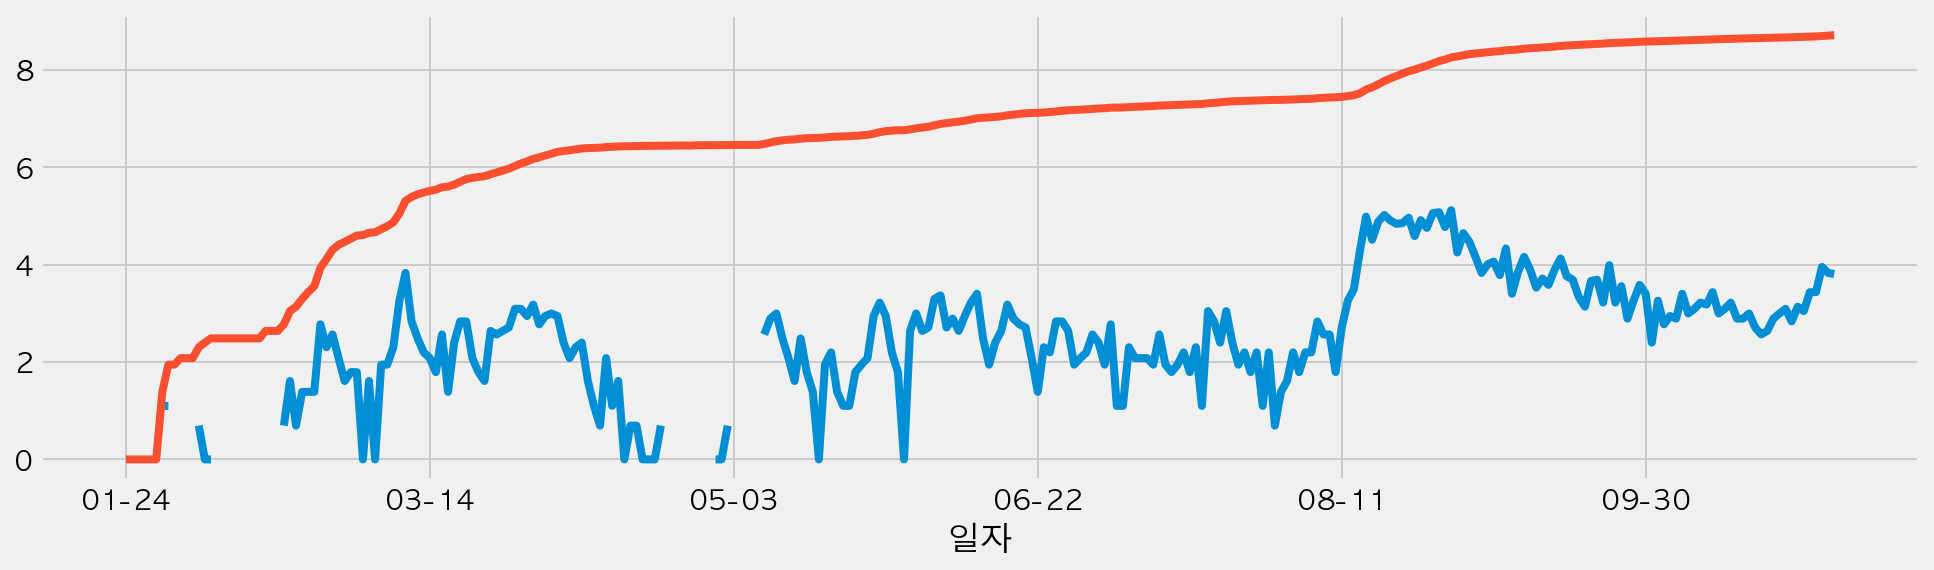

In [140]:
np.log(cum_day['확진자수']).plot()
np.log(cum_day['누적확진']).plot(figsize=(15,4))

### 확진월과 요일 구하기

In [141]:
all_day.head(1)

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24


In [143]:
#확진월
all_day['확진월'] = all_day['확진일자'].dt.month
#확진요일
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek

all_day.head(2)

,확진일자,확진자수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5


In [157]:
# 월별, 요일별 확진자수를 groupby 로 구하기
all_day_week = all_day.groupby(['확진월','확진요일'])['확진자수'].sum()
all_day_week

확진월  확진요일
1    0         0.0
     1         0.0
     2         0.0
     3         3.0
     4         4.0
             ...  
10   2        94.0
     3       123.0
     4       137.0
     5       122.0
     6        88.0
Name: 확진자수, Length: 70, dtype: float64

In [158]:
# unstack()은 인덱스를 컬럼으로 변경하는 것. fillna는 비어있는 값(NaN) 을 변경해주는 것, astype은 int나 str같은 성격 바꿔주는것
all_day_week = all_day_week.unstack().fillna(0).astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [159]:
dayofweek = '월 화 수 목 금 토 일'
dayofweek = dayofweek.split()
print(type(dayofweek))
dayofweek

<class 'list'>


['월', '화', '수', '목', '금', '토', '일']

In [160]:
# 컬럼의 이름을 한글요일로 변경
all_day_week.columns = dayofweek
all_day_week


,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [165]:
# style.background_gradient로 색상을 표현
all_day_week.style.background_gradient(cmap='Reds')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126
